In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


features=pd.read_csv('C:/Users/User/Desktop/Features data set.csv')
sales=pd.read_csv('C:/Users/User/Desktop/sales data-set.csv')
stores=pd.read_csv('C:/Users/User/Desktop/stores data-set.csv')

features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

print(features.shape)
print(sales.shape)
print(stores.shape)

print(sales[0:1].Date, sales[-1:].Date)

print(features[0:1].Date, features[-1:].Date)


(8190, 12)
(421570, 5)
(45, 3)
0   2010-05-02
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [20]:
data=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
data=pd.merge(data,stores, on=['Store'], how='left')

data=data.fillna(0)
data['Temperature'] = (data['Temperature']- 32) * 5./9.

types_encoded, types =data['Type'].factorize()
data['Type'] = types_encoded

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [21]:
print('training_data duplicated:{}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace=True)

training_data duplicated:0


In [22]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [23]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
#IsHoliday
le = LabelEncoder()
le.fit(data.IsHoliday.drop_duplicates()) 
data.IsHoliday = le.transform(data.IsHoliday)
print("True: 1 \n False: 0")
data

True: 1 
 False: 0


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,1,3.616667,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,4.405556,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,8.127778,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,0,8.055556,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,151315
5,1,1,2010-12-03,21043.39,0,14.327778,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,0,151315
6,1,1,2010-03-19,22136.64,0,12.544444,2.720,0.00,0.00,0.00,0.00,0.00,211.215635,8.106,0,151315
7,1,1,2010-03-26,26229.21,0,10.805556,2.732,0.00,0.00,0.00,0.00,0.00,211.018042,8.106,0,151315
8,1,1,2010-02-04,57258.43,0,16.816667,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,0,151315
9,1,1,2010-09-04,42960.91,0,18.811111,2.770,0.00,0.00,0.00,0.00,0.00,210.622857,7.808,0,151315


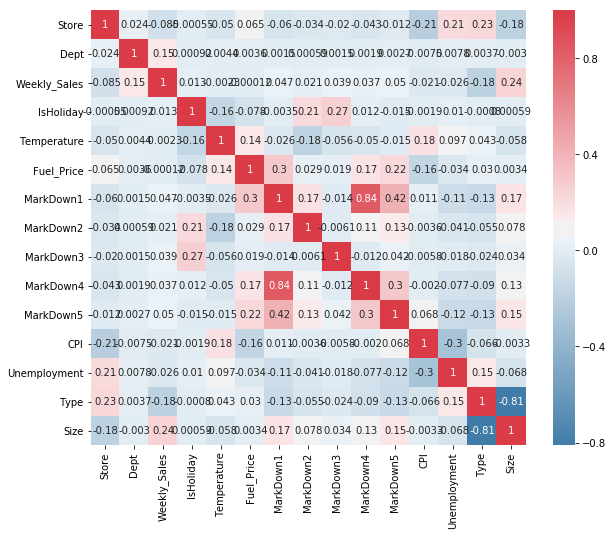

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot=True)

In [29]:
data = data.assign(year = data.Date.dt.year)
data = data.assign(week = data.Date.dt.week)
data = data.assign(yearweek = data.year * 100 + data.week)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week,yearweek
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2010,17,201017
1,1,1,2010-12-02,46039.49,1,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2010,48,201048
2,1,1,2010-02-19,41595.55,0,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2010,7,201007
3,1,1,2010-02-26,19403.54,0,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2010,8,201008
4,1,1,2010-05-03,21827.90,0,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,2010,18,201018


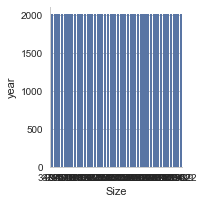

In [35]:
g = sns.FacetGrid(data)
g.map(sns.barplot, "Size", "year")
plt.show()